In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
road = cv2.imread('data/mountain.jpg')

In [3]:
road_copy = np.copy(road)

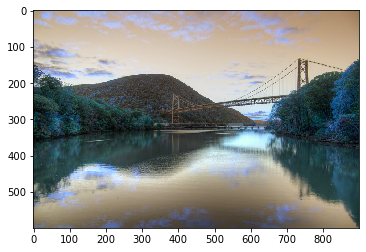

In [4]:
plt.imshow(road)

In [5]:
road.shape[:2]

(600, 899)

In [6]:
marker_image = np.zeros(road.shape[:2], dtype = np.int32 )

In [7]:
segment = np.zeros(road.shape, dtype = np.uint8)

In [8]:
marker_image.shape

(600, 899)

In [9]:
segment.shape

(600, 899, 3)

In [10]:
from matplotlib import cm

In [11]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [12]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [13]:
color = []
for i in range(10):
    color.append(create_rgb(i))

In [14]:
color

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [15]:
# Global variable

current_marker = 1
n_markers = 10
marks_updated = False



In [16]:
# Call back Function

def mouse_callback(event,x,y,flags,param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # this is for watershed algorithim
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)
        
        #user sees on the road image
        cv2.circle(road_copy,(x,y),10,color[current_marker],-1)
        
        marks_updated = True
        

In [17]:
# While loop........

cv2.namedWindow('Mountain Image')
cv2.setMouseCallback('Mountain Image',mouse_callback)

while True:
    cv2.imshow('watershed segment',segment)
    cv2.imshow('Mountain Image',road_copy)
    
    #close all windows
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
    
    # Clearing All The color Press C Key
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype = np.int32 )
        segment = np.zeros(road.shape, dtype = np.uint8)
        
    # Update color choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    # Update the Markings
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        
        segment = np.zeros(road.shape,dtype = np.uint8)
        
        for color_ind in range(n_markers):
            segment[marker_image_copy == (color_ind)] = color[color_ind]
            